# Случайные процессы. Прикладной поток.
## Практическое задание 6

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[СП17] Фамилия Имя - Задание 6"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `6.N.ipynb` и `6.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* При проверке могут быть запущены функции, которые отвечают за генерацию траекторий винеровского процесса.

------------------

### 1. Генерация винеровского процесса

Генерировать траектории винеровского процесса можно двумя способами:

1. На отрезке $[0, 1]$ траектория генерируется с помощью функций Шаудера. Описание данного метода было рассказано на лекции. Его можно найти так же в книге *А.В. Булинский, А.Н. Ширяев - Теория случайных процессов*.

2. На отрезке $[0, \pi]$ траекторию можно с помощью следующей формулы
$$W_t = \frac{\xi_0 t}{\sqrt{\pi}} +\sqrt{\frac{2}{\pi}}\sum\limits_{i=1}^{+\infty} \frac{\sin(kt)}{k} \xi_k,$$
где $\{\xi_n\}$ --- независимые стандартные нормальные случайные величины.

Траектория для $\mathbb{R}_+$ генерируется с помощью генерирования отдельных траекторий для отрезков длины 1 или $\pi$ (в зависимости от метода) с последующим непрерывным склеиванием.

Генерацию траекторий одним из этих способов вам нужно реализовать. Ваш вариант можете узнать из файла с распределением.

Напишите класс, который будет моделировать винеровский процесс.
Из бесконечной суммы берите первые $n$ слагаемых, где число $n$ соответствует параметру `precision`.
Интерфейс должен быть примерно таким (подчеркивания обязательны!):

In [1]:
import numpy as np
from types import *
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class WinerProcess:
    def __init__(self, precision=10000):
        self.n = precision
        self.xi = []
        self.start = []
        self.end = []
        self.ns = np.linspace(0, int(np.log(precision))+1, int(np.log(precision))+2)
        self.midval = 2 ** (-self.ns / 2 - 1)
        self.lens = 2 ** (-self.ns - 1)
        
    def _add_one(self):
        if len(self.xi):
            start = self.end[-1]
        else:
            start = 0
        self.xi += [np.array(sps.norm.rvs(size=self.n))]
        self.start += [start]
        self.end += [start + self.xi[-1][0]]
            
    def _create(self, t):
        while len(self.xi) < t + 1:
            self._add_one()
    
    def _get(self, xi, t):
        ks = (2 ** self.ns * (t + 1)).astype(int)
        aa = 2**(-self.ns) * ks - 1
        mid = aa + 2 ** (-self.ns - 1)
        ans = np.zeros(len(mid))
        ans[t < mid] = self.midval[t < mid] * ((t - aa[t < mid]))
        ans[t >= mid] =  self.midval[t>=mid]* (1 - (t - mid[t >= mid]) / self.lens[t>=mid])
        while (ks[-1] >= self.n):
            ks = ks[:-1]
            ans = ans[:-1]
        res = t * xi[0] + (xi[ks] * ans).sum()
        return res
        
    
    def __getitem__(self, times):
        if type(times) is float:
            times = [times]
        times = np.array(times)
        seg = times.astype(int)
        self._create(seg.max())
        return [self.start[int(times[i])] + self._get(self.xi[int(times[i])], times[i] - int(times[i])) for i in range(len(times))]

In [3]:
a = WinerProcess()
print(a[0.6, 0.7, 1.7])

[0.62745985949832384, 0.81886086012919579, 2.1756935504882842]


* Экземпляр класса должен представлять некоторую траекторию винеровского процесса. Это означает, что один и тот же экземпляр класса для одного и того же момента времени должен возвращать одно и тоже значение. Разные экземпляры класса --- разные (п.н.) траектории.

* Метод `__init__` (конструктор) должен запоминать число слагаемых в сумме (`precision`), а также (может быть) генерировать необходимые случайные величины для начального отрезка.

* Метод `__getitem__` должен принимать набор моментов времени и возвращать значения траектории винеровского процесса в эти моменты времени. При необходимости можно сгенерировать новые случайные величины. Используйте то, что запись `x.__getitem__(y)` эквивалентна `x[y]`.

* Для получения полного балла и быстро работающего кода реализация должна содержать не более одного явного цикла (по отрезкам при непосредственной генерации). Вместо всех остальных циклов нужно использовать функции библиотеки `numpy`.

* Внимательно проверьте отсутствие разрывов траектории в точках, кратных $\pi$.

* Имена любых вспомогательных методов должны начинаться с одного подчеркивания.

* В реализации желательно комментировать (почти) каждую строку кода. Это даже больше поможет вам, чем нам при проверке.

Сгенерируйте траекторию винеровского процесса и постройте ее график. Сгенерируйте еще одну траекторию и постройте график двумерного винеровского процесса. Графики должны быть похожими на графики с семинара.

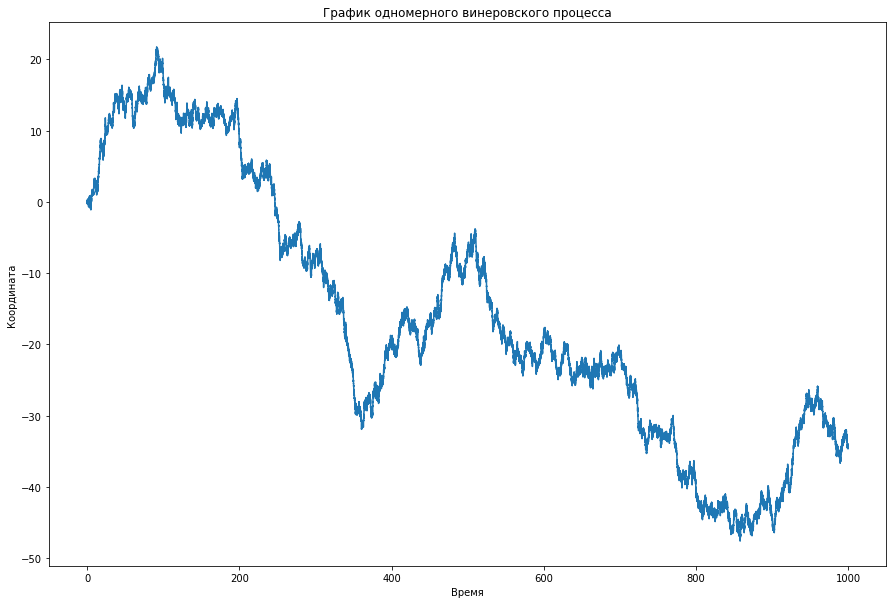

In [11]:
grid = np.linspace(0, 1000, 100000)
W = WinerProcess()
w = W[grid]
plt.figure(figsize=(15, 10))
plt.plot(grid, w)
plt.title("График одномерного винеровского процесса")
plt.xlabel("Время")
plt.ylabel("Координата")
plt.show()

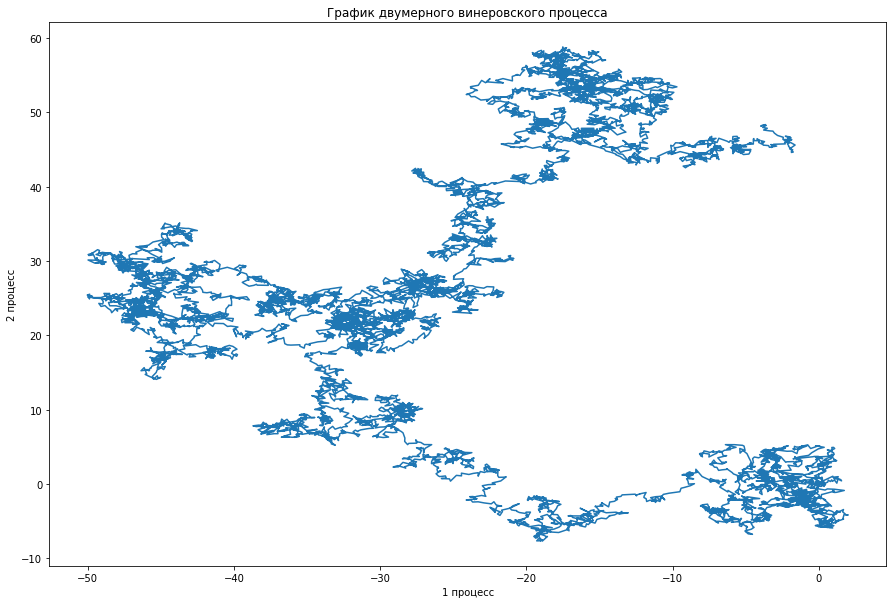

In [9]:
grid = np.linspace(0, 1000, 10000)
W = WinerProcess()
w = W[grid]
W1 = WinerProcess()
w1 = W1[grid]
plt.figure(figsize=(15, 10))
plt.plot(w, w1)
plt.title("График двумерного винеровского процесса")
plt.xlabel("1 процесс")
plt.ylabel("2 процесс")
plt.show()

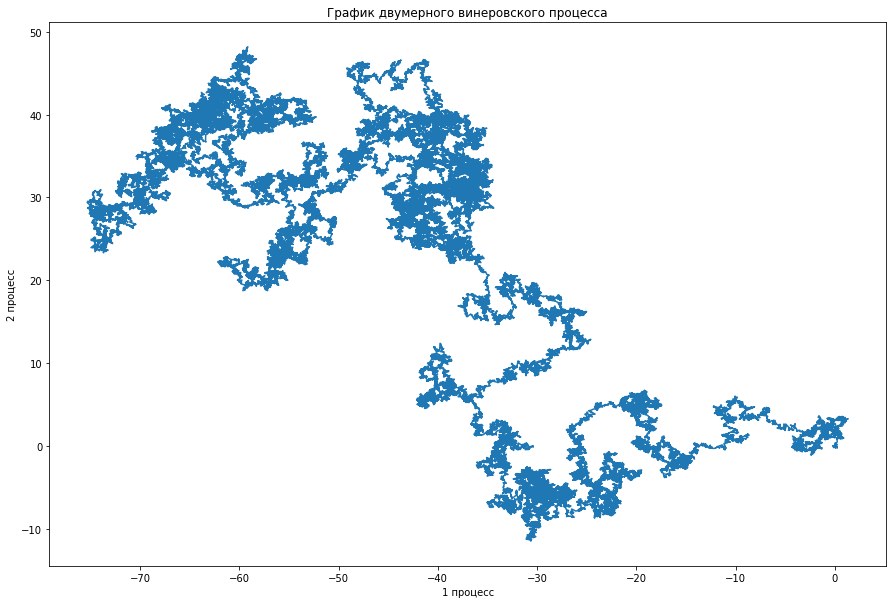

In [6]:
grid = np.linspace(0, 1000, 100000)
W = WinerProcess()
w = W[grid]
W1 = WinerProcess()
w1 = W1[grid]
plt.figure(figsize=(15, 10))
plt.plot(w, w1)
plt.title("График двумерного винеровского процесса")
plt.xlabel("1 процесс")
plt.ylabel("2 процесс")
plt.show()

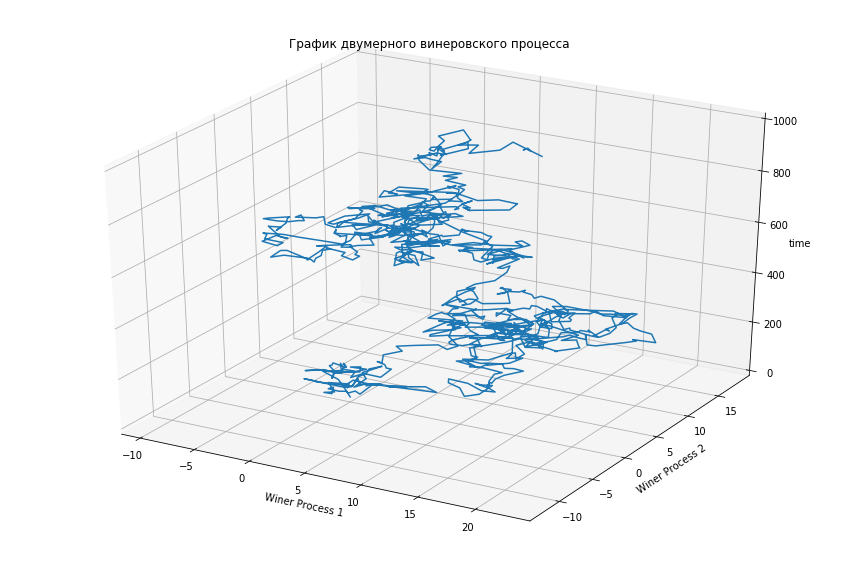

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
grid = np.linspace(0, 1000, 1000)
W = WinerProcess()
w = W[grid]
W1 = WinerProcess()
w1 = np.array(W1[grid])
w = np.array(w)
ax.plot(w, w1, grid)
plt.title("График двумерного винеровского процесса")
ax.set_xlabel('Winer Process 1')
ax.set_ylabel('Winer Process 2')
ax.set_zlabel('time')
plt.show()

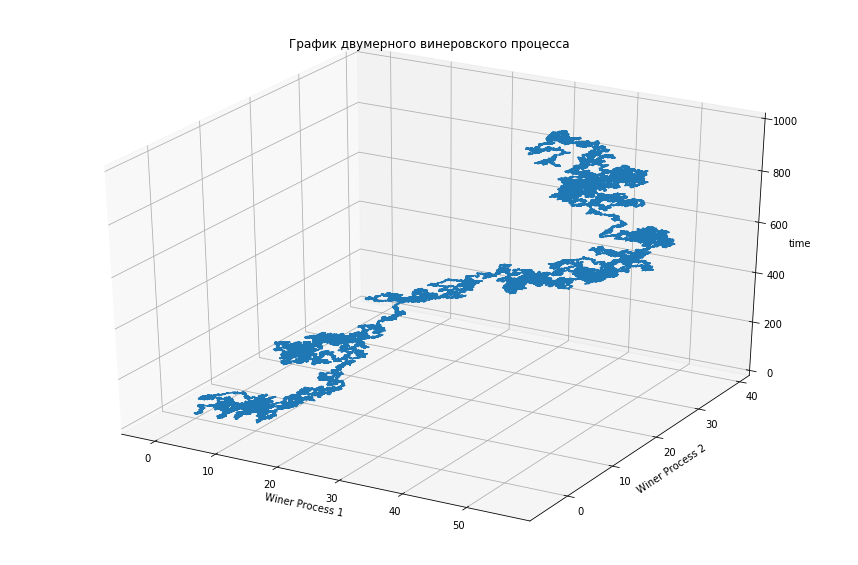

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
grid = np.linspace(0, 1000, 100000)
W = WinerProcess()
w = W[grid]
W1 = WinerProcess()
w1 = np.array(W1[grid])
w = np.array(w)
ax.plot(w, w1, grid)
plt.title("График двумерного винеровского процесса")
ax.set_xlabel('Winer Process 1')
ax.set_ylabel('Winer Process 2')
ax.set_zlabel('time')
plt.show()

Допустим, для исследования свойств траекторий винеровского процесса нам нужно сгенерировать траекторию с хорошей точностью до достаточно большого значения $t$.
Какие проблемы могут возникнуть при использовании реализованного класса?
Для этого попробуйте запустить следующий код.

In [ ]:
Wt = WinerProccess()
t = np.linspace(0, 10 ** 7, 10 ** 5)
values = Wt[t]

Опишите подробно причину проблемы, которая в данном случае возникает.

Проблема в том, что мы разбиваем отрезок на отрезки длины 1, и для каждого из них генерим 10**4 случайных величин. Это очень долго, и занимает бесконечное кол-во памяти. В данном случае не во все отрезки попадают точки запросов.

...

Для избавления от таких проблем реализуйте следующую функцию:

In [13]:
def winer_process_path(end_time, step, precision=10000):
    def _get(xi, t):
        ks = (2 ** nss * (t + 1)).astype(int)
        aa = 2**(-nss) * ks - 1
        mid = aa + 2 ** (-nss - 1)
        ans = np.zeros(len(mid))
        ans[t < mid] = midval[t < mid] * ((t - aa[t < mid]))
        ans[t >= mid] =  midval[t>=mid]* (1 - (t - mid[t >= mid]) / lens[t >= mid])
        while (ks[-1] >= precision): # выполняется О(1) раз
            ks = ks[:-1]
            ans = ans[:-1]
        res = 0
        for (i, el) in enumerate(ks):
            if (el not in xi):
                xi[el] = xis2[xiscur]
                if (xiscur == len(nss)):
                    curind = 0
                    blocks = sps.norm.rvs(size=10000)

            res += xi[el] * ans[i]
        
        #res = (xi[ks] * ans).sum()
        
        
        return res
    # Моменты времени, в которые нужно вычислить значения
    times = np.arange(0, end_time, step)
    # Сюда запишите значения траектории в моменты времени times
    values = np.zeros_like(times).astype(float)
    
    
    seg = np.unique(times.astype(int))
    index = dict(zip(seg, np.arange(0, len(times), 1)))
    #print(len(times))
    #print(len(seg))
   # return
    xis = [dict() for j in range(len(seg))]
    xis2 = sps.norm.rvs(size=(10000))
    xiscur = 0
    #return [1], [1]
    deltas = sps.norm.rvs(size=seg[-1]+1)
    begs = np.cumsum(deltas)
    nss = np.linspace(0, int(np.log(precision))+1, int(np.log(precision))+2)
    midval = 2 ** (-nss / 2 - 1)
    lens = 2 ** (-nss - 1)
    #print(xiscur)
    a = 0
    for i in range(len(times)):
        a += 1
        ind = int(times[i])
        ind2 = index[ind]
        
        values[i] = begs[ind] + (times[i] - ind) * deltas[ind] + _get(xis[ind2], times[i] - ind)
        #print(begs[ind], values[i], (times[i] - ind), _get(xis[ind2], times[i] - ind))

    return times, values

print(winer_process_path(10, 2, 105))

(array([0, 2, 4, 6, 8]), array([ 0.49875974,  1.35881242,  0.98445376,  0.33380532, -1.05879539]))


In [15]:
%time times, values = winer_process_path(100000, 0.1)

CPU times: user 1min 38s, sys: 2.61 s, total: 1min 40s
Wall time: 1min 37s


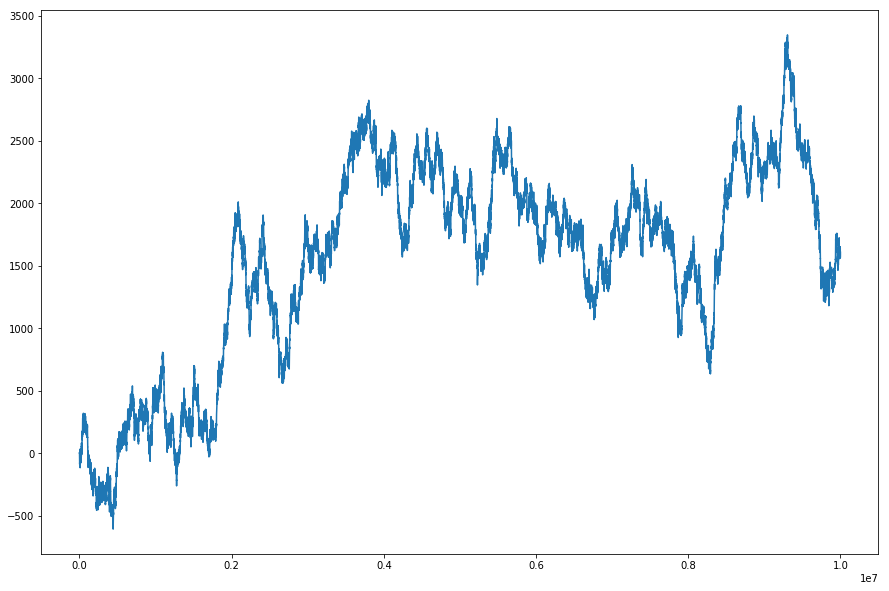

In [14]:
grid, w = winer_process_path(10000000, 100) # аналогично вызову, на котором не работала первая реализация
plt.figure(figsize=(15, 10))
plt.plot(grid, w)
plt.show()

Для получения полного балла и быстро работающего кода реализация должна содержать не более одного явного цикла (по отрезкам при непосредственной генерации). Вместо всех остальных циклов нужно использовать функции библиотеки `numpy`. Внутри этой функции можно реализовать вспомогательную функцию.

### 2. Исследования

**Следующая часть работы делается в паре.**

Для каждого их двух способов генерация траектрии винеровского процесса постройте таблицу $3 \times 3$ из графиков траекторий винеровского процесса.
По вертикали изменяйте количество $n$ используемых слагаемых в сумме ($n=10; 100; 1000$), по горизонтали --- длину отрезка, на котором генерируется винеровский процесс (использовать отрезки $[0, 10], [0, 1], [0, 0.1]$).
Обратите внимание, что от размера сетки зависит только точность отображения функции на графике, а не сама функция, поэтому сетку нужно выбирать достаточно мелкой.

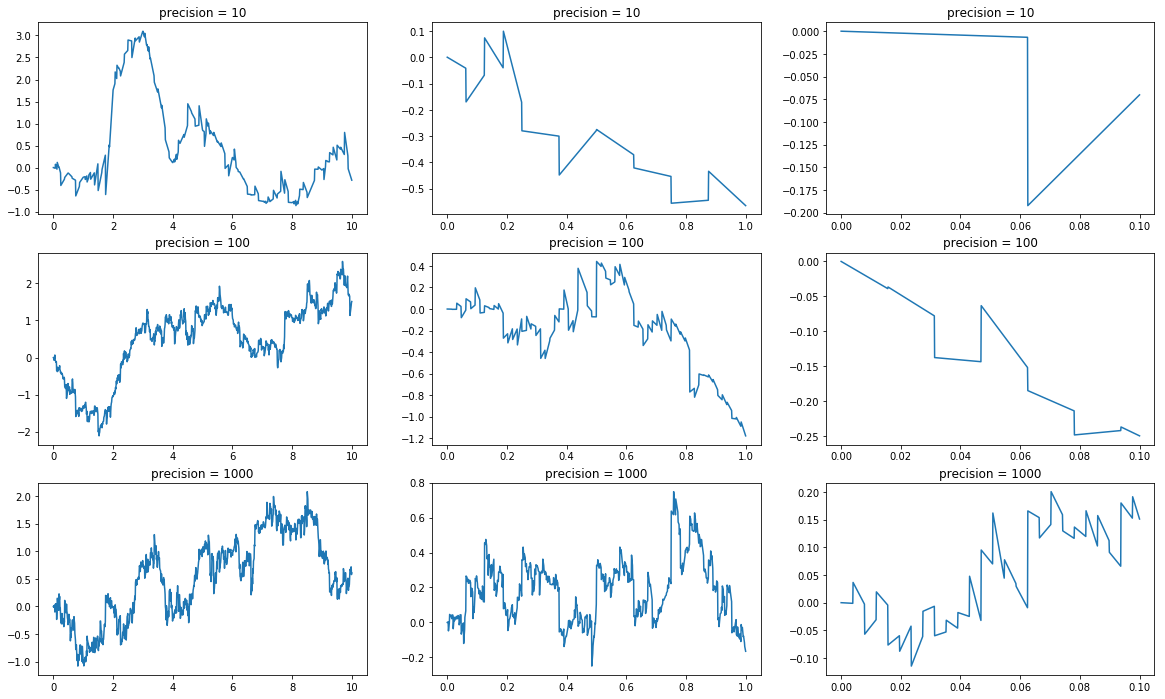

In [17]:
plt.figure(figsize=(20, 12))
for i, precision in enumerate([10, 100, 1000]):
    for j, max_time in enumerate([10, 1, 0.1]):
        t = np.linspace(0, max_time, 1000)
        values = WinerProcess(precision=precision)[t]
        
        plt.subplot(3, 3, i * 3 + j + 1)
        plt.plot(t, values)
        plt.title('precision = %d' % precision)
plt.show()

Какие выводы можно сделать про каждый способ генерации?

Способ 1: Посколько precision задано для отрезка длины 1, то при фиксированной длине интервала,т.е. при фиксированном кол-ве точек, попадающих в отрезок длины 1, чем меньше точность, тем меньше отличаются значения, потому что при малой точности многие отрезки, на которых функция Хаара ненулевая, совпадут для разных точек.
При фиксированной точности для отрезка 1 общая точность зависит от длины интервала - чем больше интервал, тем больше точность. Это так, потому что при попадании в один отрезок значения в точках больше похожи из-за того что они могут попасть в разные маленькие отрезки. А в разных отрезках этого не происходит, поэтому значения могут больше отличаться.

...

Сравните два способа генерации по времени работы.

In [18]:
%time times, values = winer_process_path(100000, 0.1)

CPU times: user 1min 39s, sys: 1.36 s, total: 1min 40s
Wall time: 5h 10min 59s


Постройте графики полученных траекторий для каждого способа? Отличаются ли траектории визуально?

Какие можно сделать выводы из сравнения двух способов генерации?

**Следующая часть работы делается индивидуально.**

1. Сгенерируйте 100 траекторий винеровского процесса с достаточно хорошей точностью и нарисуйте их на одном графике? Что можно сказать про поведение траекторий?

2. Нарисуйте график двумерного винеровского процесса (см. презентацию с семинара).

In [ ]:
grid = np.linspace(0, 100, 1000)
plt.figure(figsize=(15, 10))
fori in range(1000):
    W = WinerProcess()
    w = W[grid]
    
    plt.plot(grid, w)
plt.title("График одномерного винеровского процесса")
plt.xlabel("Время")
plt.ylabel("Координата")
plt.show()